## Data import and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import re
from scipy import stats

In [2]:
df_transactions = pd.read_excel('QVI_transaction_data.xlsx')
df_customers = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
df_customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


### Dictionary of the variables

| Variable | Description |
| -------- | ----------- |
| DATE | Date of transaction |
| STORE_NBR | Store number |
| LYLTY_CARD_NBR | Loyal card number |
| TXN_ID | Transaction ID |
| PROD_NBR | Product number |
| PROD_NAME | Product name |
| PROD_QTY | Product quantity |
| TOT_SALES | Total sales |
| LIFESTAGE | Customer life stage |
| PREMIUM_CUSTOMER | Type of customer |

## Exploratory Analysis

### 1. Transactions data
Before we start the exploratory analysis of the dataset, let’s take a close look at the columns. As we can see, the DATE column has the incorrect data type. Let’s change it to the correct one (date type). The LYLTY_CARD_NBR column has the incorrect data type. Let’s change it to the correct one (string type).

In [5]:
df_transactions['DATE'] = pd.to_datetime(df_transactions['DATE'], origin='1899-12-30', unit='D')
df_transactions['DATE'] = df_transactions['DATE'].dt.strftime('%Y-%m-%d')
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [6]:
df_transactions['LYLTY_CARD_NBR'] = df_transactions['LYLTY_CARD_NBR'].astype(str)
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  object 
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 16.2+ MB


Now we should check that we are looking at the right products by examining PROD_NAME.


In [7]:
unique_products = df_transactions['PROD_NAME'].unique()
print(unique_products)

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [8]:
product_words = pd.DataFrame({'words': [word for name in unique_products for word in re.split(r'\W+', name)]})
filtered_words = product_words[product_words['words'].str.isalpha()]
unique_words = filtered_words['words'].value_counts()
unique_words_sorted = unique_words.sort_values(ascending=False)
print(unique_words_sorted.head(10))

words
Chips       21
Smiths      16
Crinkle     14
Cut         14
Kettle      13
Salt        12
Cheese      12
Original    10
Doritos      9
Salsa        9
Name: count, dtype: int64


There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.


In [9]:
df_transactions['SALSA'] = df_transactions['PROD_NAME'].str.contains('salsa', case=False)
df_transactions = df_transactions[df_transactions['SALSA'] == False]
df_transactions = df_transactions.drop(columns=['SALSA'])
print(df_transactions)

              DATE  STORE_NBR LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       2018-10-17          1           1000       1         5   
1       2019-05-14          1           1307     348        66   
2       2019-05-20          1           1343     383        61   
3       2018-08-17          2           2373     974        69   
4       2018-08-18          2           2426    1038       108   
...            ...        ...            ...     ...       ...   
264831  2019-03-09        272         272319  270088        89   
264832  2018-08-13        272         272358  270154        74   
264833  2018-11-06        272         272379  270187        51   
264834  2018-12-27        272         272379  270188        42   
264835  2018-09-22        272         272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

Next, we can use `.describe()` to check summary statistics such as mean, min and max values for each feature to see if there are any obvious outliers in the data. And we will use df.isnull() to see if there are any nulls in any of the columns (`NA's : number of nulls` will appear in the output if there are any nulls).

In [10]:
df_transactions.describe()

,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.415841e+06,114.000000,200.000000,650.000000


In [11]:
nulls_values = df_transactions.isnull().sum()
print(nulls_values)

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further.

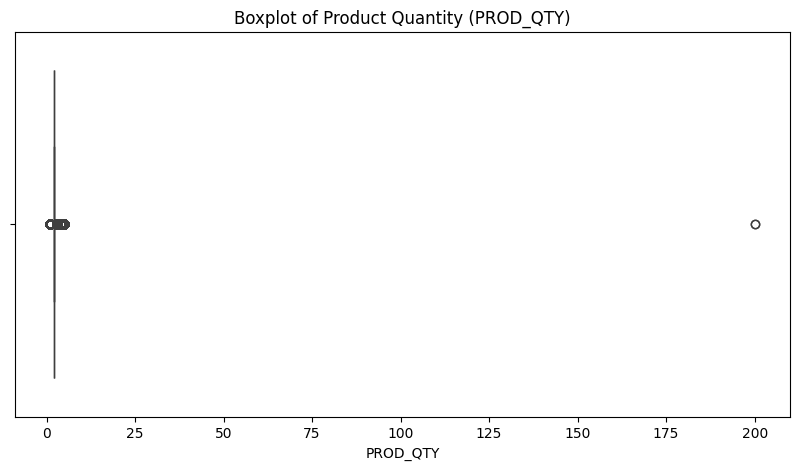

In [12]:
# Checking for outliers in the 'PROD_QTY' column
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_transactions['PROD_QTY'])
plt.title('Boxplot of Product Quantity (PROD_QTY)')
plt.show()

 Let's investigate further the case where 200 packets of chips are bought in one transaction.

In [13]:
outlier_view = df_transactions[df_transactions['PROD_QTY'] == 200]
print(outlier_view)

             DATE  STORE_NBR LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  2018-08-19        226         226000  226201         4   
69763  2019-05-20        226         226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


Let's see if the customer has had other transactions

In [14]:
customer_filter = df_transactions[df_transactions['LYLTY_CARD_NBR'] == '226000']
print(customer_filter)

             DATE  STORE_NBR LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  2018-08-19        226         226000  226201         4   
69763  2019-05-20        226         226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.


In [15]:
transaction_data = df_transactions[df_transactions['LYLTY_CARD_NBR'] != '226000']
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

In [16]:
transaction_counts = transaction_data.groupby('DATE').size()
print(transaction_counts)


DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Length: 364, dtype: int64


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date

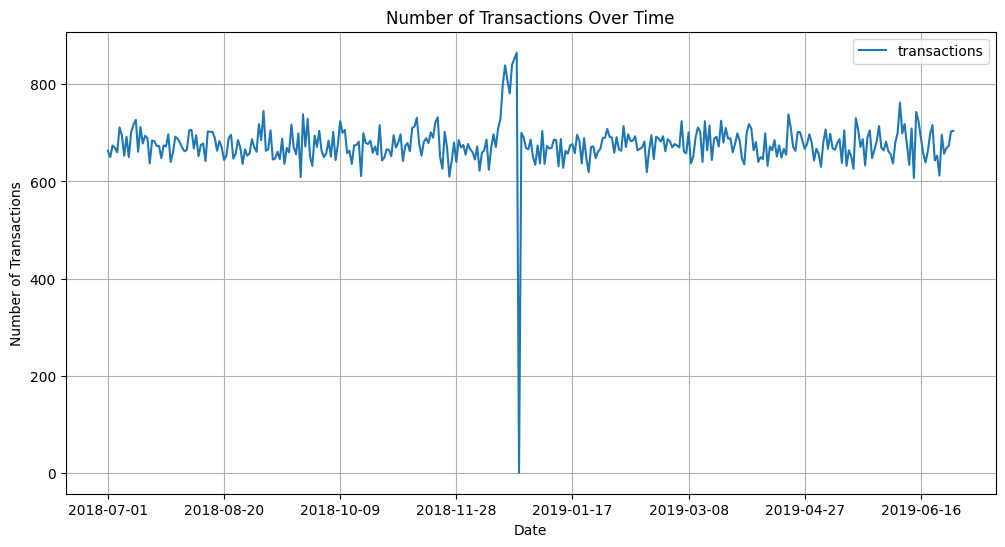

In [17]:
# Create a sequence of dates from 1 Jul 2018 to 30 Jun 2019
transaction_by = pd.date_range(start='2018-07-01', end='2019-06-30')
transaction_by_day = pd.DataFrame(transaction_by, columns=['DATE'])

# Ensure DATE is in the correct format
transaction_by_day['DATE'] = transaction_by_day['DATE'].dt.strftime('%Y-%m-%d')

# Assuming transaction_counts is a Series, convert it to a DataFrame with a name
transaction_counts = transaction_counts.reset_index()
transaction_counts.columns = ['DATE', 'transactions']

# Merge the dataframes
transaction_by_day = transaction_by_day.merge(transaction_counts, on='DATE', how='left')

# Fill missing transaction values with 0
transaction_by_day['transactions'] = transaction_by_day['transactions'].fillna(0)

# Plot the number of transactions over time
transaction_by_day.plot(x='DATE', y='transactions', kind='line', figsize=(12, 6))
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this

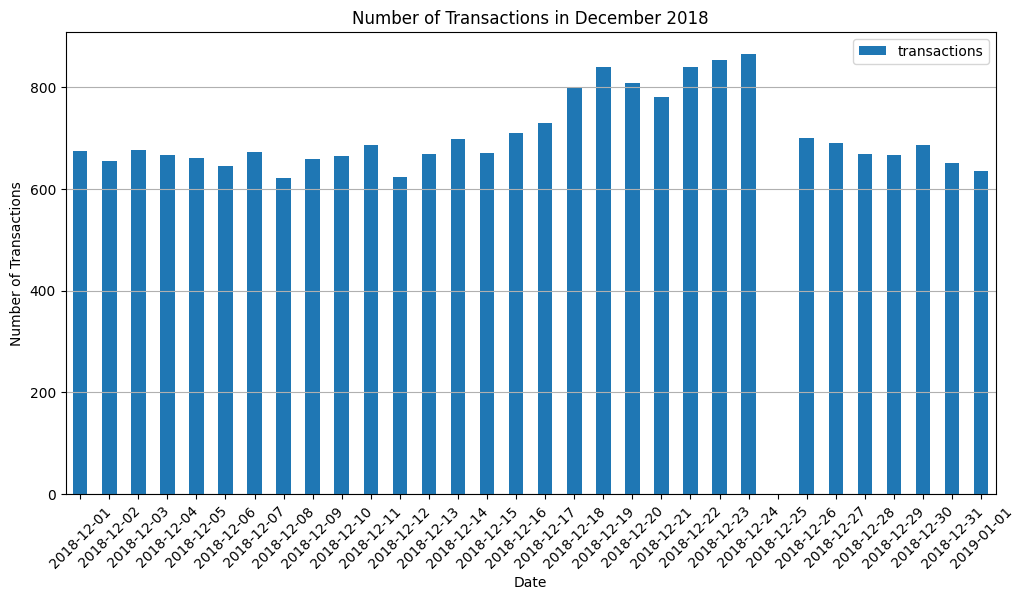

In [18]:
# Filter the data for the month of December
december_data = transaction_by_day[(transaction_by_day['DATE'] >= '2018-12-01') & (transaction_by_day['DATE'] <= '2019-01-01')]

# Visualize the December data
december_data.plot(x='DATE', y='transactions', kind='bar', figsize=(12, 6))
plt.title('Number of Transactions in December 2018')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from `PROD_NAME`. We will start with pack size.

In [19]:
def parse_number(prod_name):
    return int(re.findall(r'\d+', prod_name)[0])

transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].apply(parse_number)

pack_size_counts = transaction_data.groupby('PACK_SIZE').value_counts().sort_index()
print(pack_size_counts)

/tmp/ipykernel_83/408388228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].apply(parse_number)
PACK_SIZE  DATE        STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME                                PROD_QTY  TOT_SALES
70         2018-07-01  128        128179          131744  38        Infuzions Mango     Chutny Papadums 70g  2         4.8          1
           2018-07-02  69         69005           65839   38        Infuzions Mango     Chutny Papadums 70g  2         4.8          1
                                  69013           65887   38        Infuzions Mango     Chutny Papadums 70g  2         4.8          1
                       103        103185          103287  38   

Change the data type of `PACK_SIZE` to `category`

In [20]:
transaction_data['PACK_SIZE'] = transaction_data['PACK_SIZE'].astype('category')
transaction_data.dtypes

/tmp/ipykernel_83/2974395717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['PACK_SIZE'] = transaction_data['PACK_SIZE'].astype('category')


DATE                object
STORE_NBR            int64
LYLTY_CARD_NBR      object
TXN_ID               int64
PROD_NBR             int64
PROD_NAME           object
PROD_QTY             int64
TOT_SALES          float64
PACK_SIZE         category
dtype: object

Let's plot a histogram of PACK_SIZE 

/tmp/ipykernel_83/3142891978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PACK_SIZE', data=transaction_data, palette='viridis', order=sorted(transaction_data['PACK_SIZE'].unique()))


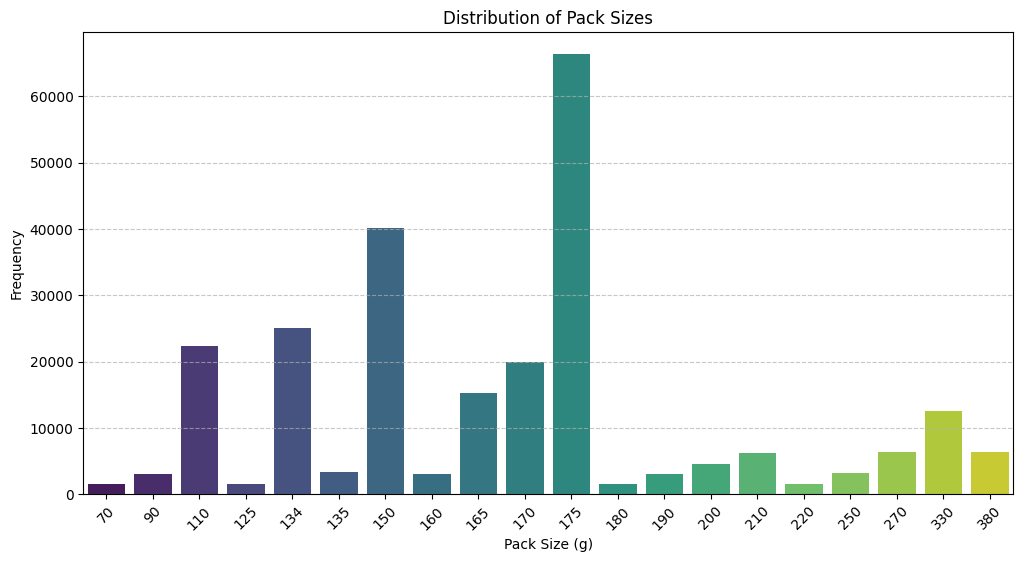

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PACK_SIZE', data=transaction_data, palette='viridis', order=sorted(transaction_data['PACK_SIZE'].unique()))
plt.title('Distribution of Pack Sizes')
plt.xlabel('Pack Size (g)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Now to create brands, we can use the first word in `PROD_NAME` to work out the brand name...


In [22]:
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.extract(r'(\w+)')

brand_counts = transaction_data.groupby('BRAND').size().sort_values(ascending=False)
print(brand_counts)

BRAND
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
dtype: int64
/tmp/ipykernel_83/3812604466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.extract(r'(\w+)')


Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips. Let's combine these together.

In [23]:
transaction_data = transaction_data.replace(to_replace='Red', value='RRD')
brand_counts = transaction_data.groupby('BRAND').size().sort_values(ascending=False)
print(brand_counts)

BRAND
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
RRD           16321
Thins         14075
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
dtype: int64


### 2. Customer data

Now that we are happy with the transaction dataset, let's have a look at the customer dataset. We will do some basic summaries of the dataset, including distributions of any key columns.

In [24]:
df_customers.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [25]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
df_customers["LYLTY_CARD_NBR"] = df_customers["LYLTY_CARD_NBR"].astype(str)
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  object
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


## 3. Data preparation
Merge the two datasets


In [27]:
data = df_transactions.merge(df_customers, on='LYLTY_CARD_NBR', how='left')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246742 entries, 0 to 246741
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              246742 non-null  object 
 1   STORE_NBR         246742 non-null  int64  
 2   LYLTY_CARD_NBR    246742 non-null  object 
 3   TXN_ID            246742 non-null  int64  
 4   PROD_NBR          246742 non-null  int64  
 5   PROD_NAME         246742 non-null  object 
 6   PROD_QTY          246742 non-null  int64  
 7   TOT_SALES         246742 non-null  float64
 8   LIFESTAGE         246742 non-null  object 
 9   PREMIUM_CUSTOMER  246742 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 18.8+ MB


Export the data to a CSV file

In [29]:
data.to_csv('data.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ebb3dfc0-5f24-4cca-8c17-95b5f4c45dc1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>